In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from scipy.sparse.linalg import svds

Consider the following LASSO problem
$$
\underset{\bf x}{\rm minimize} \,\,  \frac{1}{2}\| {\bf A}{\bf x} - {\bf b}\|_2^2 +  \| {\bf x}\|_1 
$$
with variable ${\bf x} \in \mathbb{R}^d$. 

In [12]:
def Lasso_function(A,x,y):
  f1 = 0.5*np.linalg.norm(np.dot(A,x) - y)**2 + np.linalg.norm(x,1)
  return f1

In [3]:
def Lasso_gradient_f(A,x,y):
  g1 = np.dot(A.T,(np.dot(A,x)-y))
  return g1

In [4]:
def Lasso_prox_operator(x,alpha):
  return np.sign(x) * np.maximum(abs(x) - alpha* lr, 0)

In [5]:
## sythentic data generation

n = 10             ## dimension of feature vector
np.random.seed(20)
A = np.random.randn(n,n) ## Data matrix
# x_true = 5*np.random.randn(n)*np.random.randint(0,2,n)*np.random.randint(0,2,n)
y = np.random.randn(n)

In [8]:
## LASSO solution using sklearn

def Lasso_sklearn(A,y):
  model = Lasso(alpha = 0.1)
  model.fit(A,y)
  x_lasso = model.coef_
  Lasso_f_opt = Lasso_function(A,x_lasso,y)
  print('The optimal value = ',Lasso_f_opt)
  return Lasso_f_opt, x_lasso

4.305528719643369


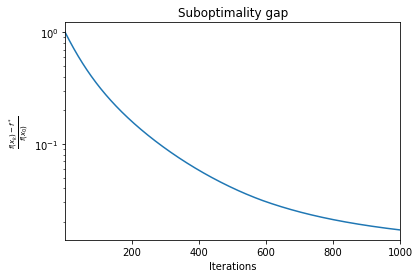

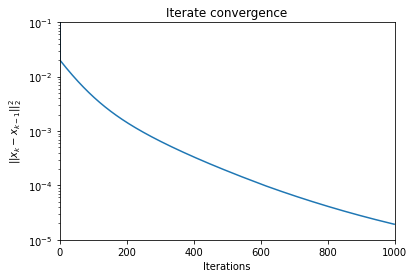

In [ ]:
### proximal GD
iterations = 1000
np.random.seed(20)
Lasso_f_opt, x_lasso = Lasso_sklearn(A,y)
x = 20*np.random.randn(iterations,n)  ## random initialization
Lasso_fun_val = np.zeros(iterations)  ## variable to store function value
Lasso_iterate_val = np.zeros(iterations)  ## Variable to store iterate convergence
alpha = .1       ## Hyper parameter for Prox GD
lr = 0.0003      ## Learning rate
Lasso_fun_val[0] = Lasso_function(A,x[0],y)
Lasso_iterate_val[0] = np.linalg.norm(x[0],2)**2
for i in range(1,iterations):
  # lr = lr1*2/(i+2)
  x1 = x[i-1] - lr*Lasso_gradient_f(A,x[i-1],y)  ## GD update
  x[i] = Lasso_prox_operator(x1,alpha)           ## Prox operator
  Lasso_fun_val[i] = Lasso_function(A,x[i],y)
  Lasso_iterate_val[i] = np.linalg.norm((x[i]-x[i-1]),2)**2 

axis = np.linspace(0,iterations-1,iterations)
plt.semilogy(axis,np.abs(Lasso_fun_val -Lasso_f_opt)/Lasso_fun_val[0])
plt.xlim([1,iterations])
plt.xlabel('Iterations')
plt.ylabel(r'$\frac{f(x_k) - f^*}{f(x_0)}$')
plt.title('Suboptimality gap')
plt.savefig('Suboptimality_gap_LASSO_synthetic.eps')
# files.download('Suboptimality_gap_LASSO_synthetic.eps')

plt.figure()
plt.semilogy(axis,Lasso_iterate_val)
plt.xlim([0,iterations])
plt.ylim([1e-5,1e-1])
plt.xlabel('Iterations')
plt.ylabel(r'${||x_k - x_{k-1}||_2^2}$')
plt.title('Iterate convergence')
plt.savefig('Iterate_convergence_LASSO_synthetic.eps')
# files.download('Iterate_convergence_LASSO_synthetic.eps')

In [13]:
## California housing data

data = pd.read_csv('/content/sample_data/california_housing_test.csv')
d = np.array(data)
for i in range(9):
  d[:,i] = d[:,i]/np.sum(np.abs(d[:,i]))
A_cal = d[:,0:8]
y_cal = d[:,8]
lamda = .1
m_cal,n_cal = A_cal.shape
f_opt_cal, x_opt_cal = Lasso_sklearn(A_cal,y_cal)

8

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

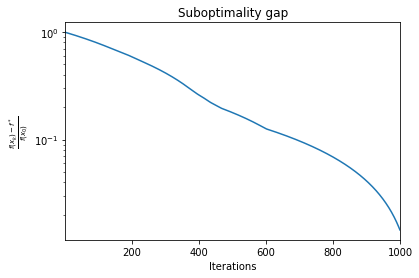

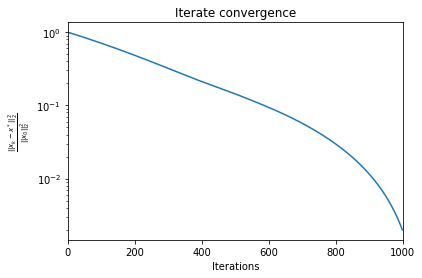

In [10]:
### proximal GD California housing

iterations = 1000
np.random.seed(20)
x_cal = 20*np.random.randn(iterations,n_cal)  ## random initialization
Lasso_fun_val_cal = np.zeros(iterations)  ## variable to store function value
Lasso_iterate_val_cal = np.zeros(iterations)  ## Variable to store iterate convergence
alpha = .1       ## Hyper parameter for Prox GD
lr = 0.385      ## Learning rate
Lasso_fun_val_cal[0] = Lasso_function(A_cal,x_cal[0],y_cal)/m_cal
Lasso_iterate_val_cal[0] = np.linalg.norm(x_cal[0]-x_opt_cal,2)**2/np.linalg.norm(x_cal[0],2)**2
for i in range(1,iterations):
  # lr = lr1*2/(i+2)
  x1 = x_cal[i-1] - lr*Lasso_gradient_f(A_cal,x_cal[i-1],y_cal)  ## GD update
  x_cal[i] = Lasso_prox_operator(x1,alpha)           ## Prox operator
  Lasso_fun_val_cal[i] = Lasso_function(A_cal,x_cal[i],y_cal)/m_cal
  Lasso_iterate_val_cal[i] = np.linalg.norm((x_cal[i]-x_opt_cal),2)**2/np.linalg.norm(x_cal[0],2)**2 

axis = np.linspace(0,iterations-1,iterations)
plt.semilogy(axis,np.abs(Lasso_fun_val_cal -f_opt_cal)/Lasso_fun_val_cal[0])
plt.xlim([1,iterations])
plt.xlabel('Iterations')
plt.ylabel(r'$\frac{f(x_k) - f^*}{f(x_0)}$')
plt.title('Suboptimality gap')
plt.savefig('Suboptimality_gap_LASSO_california.eps')
files.download('Suboptimality_gap_LASSO_california.eps')

plt.figure()
plt.semilogy(axis,Lasso_iterate_val_cal)
plt.xlim([0,iterations])
# plt.ylim([1e-5,1e-1])
plt.xlabel('Iterations')
plt.ylabel(r'$\frac{||x_k - x^*||_2^2}{||x_0||_2^2}$')
plt.title('Iterate convergence')
plt.savefig('Iterate_convergence_LASSO_california.eps')
files.download('Iterate_convergence_LASSO_california.eps')

The ridge regression problem can be expressed as an equivalent constrained optimization problem
$$
\underset{\bf x}{\rm minimize} \,\, f({\bf x}) = \frac{1}{2}\| {\bf A}{\bf x} - {\bf b}\|_2^2 
$$
subject to
$$
\| {\bf x}\|_2 \leq t.
$$


In [11]:
def l2_projection_operator(x,t):
  if(np.linalg.norm(x)> t):
    x = t*x/np.linalg.norm(x)
  return x 

In [52]:
## Ridge regression solution using sklearn

def Ridge_sklearn(A,y,alp):
  model = Ridge(alpha = alp)
  model.fit(A,y)
  x_lasso = model.coef_
  Lasso_f_opt = Lasso_function(A,x_lasso,y)
  print(Lasso_f_opt)
  return Lasso_f_opt, x_lasso
# Ridge_sklearn(A,y)

In [13]:
## sythentic data generation

n = 10             ## dimension of feature vector
np.random.seed(20)
A = np.random.randn(n,n) ## Data matrix
x_true = 5*np.random.randn(n)
y = np.dot(A,x_true)
Lasso_f_opt = 0

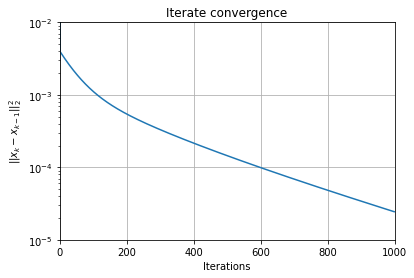

In [139]:
### Projected gradient descent

iterations = 1000
np.random.seed(20)
x_proj = np.random.randn(iterations,n)  ## random initialization
Ridge_fun_val_proj = np.zeros(iterations)  ## variable to store function value
Ridge_iterate_val_proj = np.zeros(iterations)  ## Variable to store iterate convergence
t = 15       ## Hyper parameter for Proj GD
lr = 0.0003      ## Learning rate
Ridge_fun_val_proj[0] = Lasso_function(A,x_proj[0],y)
Ridge_iterate_val_proj[0] = np.linalg.norm(x_proj[0],2)**2
for i in range(1,iterations):
  # lr = lr1*2/(i+2)
  x1 = x_proj[i-1] - lr*Lasso_gradient_f(A,x_proj[i-1],y)  ## GD update
  x_proj[i] = l2_projection_operator(x1,t)           ## Prox operator
  Ridge_fun_val_proj[i] = Lasso_function(A,x_proj[i],y)
  Ridge_iterate_val_proj[i] = np.linalg.norm((x_proj[i] - x_proj[i-1]),2)**2 

axis = np.linspace(0,iterations-1,iterations)
plt.semilogy(axis,np.abs(Ridge_fun_val_proj)/Ridge_fun_val_proj[0])
plt.xlim([1,iterations])
plt.xlabel('Iterations')
plt.ylabel(r'$\frac{f(x_k) }{f(x_0)}$')
plt.title('Suboptimality gap')
plt.savefig('Suboptimality_gap_LASSO_synthetic_proj_GD.eps')
files.download('Suboptimality_gap_LASSO_synthetic_proj_GD.eps')

plt.figure()
plt.semilogy(axis,Ridge_iterate_val_proj)
plt.xlim([0,iterations])
plt.ylim([1e-5,1e-2])
plt.xlabel('Iterations')
plt.grid()
plt.ylabel(r'${||x_k - x_{k-1}||_2^2}$')
plt.title('Iterate convergence')
plt.savefig('Iterate_convergence_LASSO_synthetic_proj_GD.eps')
files.download('Iterate_convergence_LASSO_synthetic_proj_GD.eps')


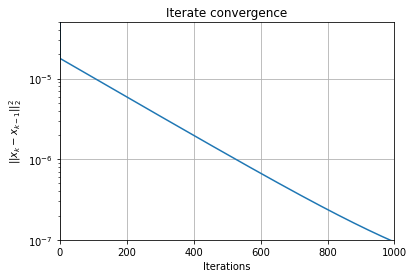

In [138]:
### Projected gradient descent on california housing dataset

iterations = 1000
np.random.seed(20)
x_proj_cal = np.random.randn(iterations,n_cal)  ## random initialization
Ridge_fun_val_proj_cal = np.zeros(iterations)  ## variable to store function value
Ridge_iterate_val_proj_cal = np.zeros(iterations)  ## Variable to store iterate convergence
t_cal = 100       ## Hyper parameter for Proj GD
lr_cal = 0.9      ## Learning rate
Ridge_fun_val_proj_cal[0] = Lasso_function(A_cal,x_proj_cal[0],y_cal)
Ridge_iterate_val_proj_cal[0] = np.linalg.norm(x_proj_cal[0],2)**2
for i in range(1,iterations):
  # lr = lr1*2/(i+2)
  x1 = x_proj_cal[i-1] - lr_cal*Lasso_gradient_f(A_cal,x_proj_cal[i-1],y_cal)  ## GD update
  x_proj_cal[i] = l2_projection_operator(x1,t_cal)           ## Prox operator
  Ridge_fun_val_proj_cal[i] = Lasso_function(A_cal,x_proj_cal[i],y_cal)
  Ridge_iterate_val_proj_cal[i] = np.linalg.norm((x_proj_cal[i] - x_proj_cal[i-1]),2)**2 

axis = np.linspace(0,iterations-1,iterations)
plt.semilogy(axis,np.abs(Ridge_fun_val_proj_cal)/Ridge_fun_val_proj_cal[0])
plt.xlim([1,iterations])
plt.xlabel('Iterations')
plt.ylabel(r'$\frac{f(x_k)}{f(x_0)}$')
plt.title('Suboptimality gap')
plt.grid()
plt.savefig('Suboptimality_gap_LASSO_california_proj_GD.eps')
files.download('Suboptimality_gap_LASSO_california_proj_GD.eps')

plt.figure()
plt.semilogy(axis,Ridge_iterate_val_proj_cal)
plt.xlim([0,iterations])
plt.ylim([1e-7,5e-5])
plt.xlabel('Iterations')
plt.ylabel(r'${||x_k - x_{k-1}||_2^2}$')
plt.title('Iterate convergence')
plt.grid()
plt.savefig('Iterate_convergence_LASSO_california_proj_GD.eps')
files.download('Iterate_convergence_LASSO_california_proj_GD.eps')

The matrix completion problem can be formulated as,
\begin{equation*}
    \frac{1}{N}||\mathbf{X}_k-\mathbf{A}||_F^2 \quad \mathrm{s.to}\quad  ||\mathbf{X}_k||_*\leq R,
\end{equation*}

In [2]:
## Projected GD on Movie lens dataset

m = 943
n = 1682
data = pd.read_table('http://files.grouplens.org/datasets/movielens/ml-100k/u.data')
X0 = np.asmatrix(data)
s1 = X0.size
X2 = np.array(X0)
m1 ,n1  = X2.shape

X = np.zeros((m,n),dtype='float')
X1 = np.zeros((m,n),dtype='float')
index = np.zeros((m,n),dtype='int')
index1 = np.zeros((m,n),dtype='int')
for i in range(m1):
  a1 = X2[i,0]
  a2 = X2[i,1]
  index[a1-1,a2-1] = 1
  X1[a1-1,a2-1] = X2[i,2]
  if (np.random.randint(0,2,1)==1):
    X[a1-1,a2-1] = X2[i,2]
    index1[a1-1,a2-1] = 1
index2 = index - index1
s2 = np.count_nonzero(X1)
print(s1,s2)
X3 = X1*index2
count = np.sum(index)
print('count', count)

399996 99999
count 99999


In [3]:
def f(A):
  A1 = A*index
  g = 0.5*np.linalg.norm(A1-X1,'fro')**2
  return g/count

def projection(Z,R):
  U = np.zeros((m,m))
  V = np.zeros((n,n))
  a = np.zeros(m)
  # U[:,:R],S,V[:R,:] = svds(Z,k=R)
  # a[:R] = S
  U,S,V = np.linalg.svd(Z)
  # a = np.where(S>R,S,0)
  sum = 0
  for i in range(m):
    sum = sum + S[i]
    if(sum <= R):
      a[i] = S[i]
  A = np.zeros((m,n))
  np.fill_diagonal(A,a) 
  return np.dot(U,np.dot(A,V.T))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

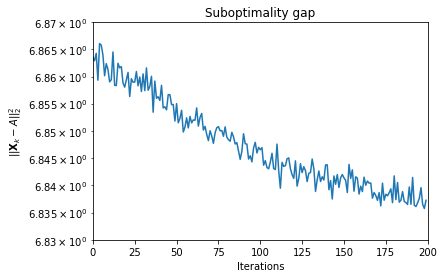

In [10]:
## Projected GD for movie lens dataset

iterations = 200
R = 120  ## Trace norm constraint
Z_pg = np.zeros((m,n))
f_val_pg = np.zeros(iterations)
f_val_pg[0] = f(Z_pg)
for i in range(1,iterations):
  eta = 500
  grad= (Z_pg - X1)*index/count
  Z1 = Z_pg
  Z_pg = Z_pg - eta*grad
  Z_pg = np.where(Z_pg>5,5,Z_pg)
  Z_pg = np.where(Z_pg<0,0,Z_pg)
  Z_pg = projection(Z_pg,R)
  # Z_pg = np.ceil(Z_pg)
  # print(np.linalg.matrix_rank(Z_pg))
  f_val_pg[i] = f(Z_pg)
axis = np.linspace(0,iterations-1,iterations)
plt.semilogy(axis,f_val_pg) 
plt.xlim([0,iterations])
plt.ylim([6.83,6.87])
plt.xlabel('Iterations')
plt.ylabel(r'${||\mathbf{X}_k - A||_2^2}$')
plt.title('Suboptimality gap')
# plt.grid()
plt.savefig('Suboptimality_gap_MovieLens_proj_GD.eps')
files.download('Suboptimality_gap_MovieLens_proj_GD.eps')